# 问题一无监督分类问题

In [3]:
import pandas as pd
import os
csv_path = os.path.join("附件1.xlsx")
d = pd.read_excel(csv_path)
d.head()

,No,652,653,654,655,656,657,658,659,660,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,1,0.094196,0.094057,0.094057,0.093992,0.093992,0.093986,0.093986,0.094197,0.094197,...,0.009897,0.009897,0.009897,0.009896,0.009896,0.009894,0.009894,0.009885,0.009885,0.009856
1,2,0.106043,0.105832,0.105832,0.105599,0.105599,0.105454,0.105454,0.105452,0.105452,...,0.017432,0.017448,0.017448,0.017450,0.017450,0.017443,0.017443,0.017430,0.017430,0.017420
2,3,0.272430,0.272049,0.272049,0.271811,0.271811,0.271008,0.271008,0.270318,0.270318,...,0.005559,0.005553,0.005553,0.005531,0.005531,0.005654,0.005654,0.005604,0.005604,0.005553
3,4,0.074814,0.074756,0.074756,0.074743,0.074743,0.074878,0.074878,0.075135,0.075135,...,0.003315,0.003315,0.003315,0.003303,0.003303,0.003295,0.003295,0.003283,0.003283,0.003266
4,5,0.322213,0.319839,0.319839,0.317635,0.317635,0.316115,0.316115,0.315650,0.315650,...,0.001080,0.001064,0.001064,0.001054,0.001054,0.001043,0.001043,0.001063,0.001063,0.001061


In [36]:
%matplotlib inline
name=list(d[0:0])[1:]# 特征的名字
# 数据集
A=[]
for i in name:
    a=d[i]
    a=list(a)
    A.append(a)
import numpy as np
X=np.transpose(np.array(A))
X.shape

(425, 3348)

In [44]:
# 尝试PCA降到二维直观表示数据
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# 保留前两个特征向量
scaler = MinMaxScaler().fit(X)
X1_scaled = scaler.transform(X)
pca = PCA(n_components=20).fit(X1_scaled)

# transform data onto the first two principal components
X1_pca = pca.transform(X1_scaled)
print("Original shape: {}".format(str(X1_scaled.shape)))
print("Reduced shape: {}".format(str(X1_pca.shape)))

Original shape: (425, 3348)
Reduced shape: (425, 20)


In [197]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X1_pca)

KMeans(n_clusters=7)

In [198]:
label = list(kmeans.labels_)

In [199]:
l0=label.index(0)
l1=label.index(1)
l2=label.index(2)
l3=label.index(3)
l4=label.index(4)
l5=label.index(5)
l6=label.index(6)

In [200]:
A=[]
for i in range(425):
    A.append(list(d.loc[i]))

/Users/yangjie/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


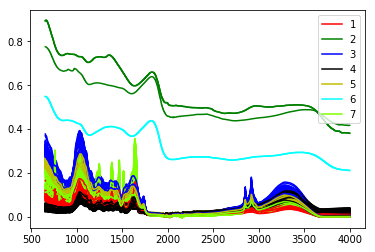

In [203]:
for i in range(425):
    if label[i]==0:
        plt.plot(name,A[i][1:],'-r')
    if label[i]==1:
        plt.plot(name,A[i][1:],'-g')
    if label[i]==2:
        plt.plot(name,A[i][1:],'-b')
    if label[i]==3:
        plt.plot(name,A[i][1:],'black')
    if label[i]==4:
        plt.plot(name,A[i][1:],'-y')
    if label[i]==5:
        plt.plot(name,A[i][1:],'aqua')
    if label[i]==6:
        plt.plot(name,A[i][1:],'chartreuse')
plt.plot(name,A[l0][1:],'-r',label='1')
plt.plot(name,A[l1][1:],'-g',label='2')
plt.plot(name,A[l2][1:],'-b',label='3')
plt.plot(name,A[l3][1:],'black',label='4')
plt.plot(name,A[l4][1:],'-y',label='5')
plt.plot(name,A[l5][1:],'aqua',label='6')
plt.plot(name,A[l6][1:],'chartreuse',label='7')
plt.legend()#指明要绘制图例见右上角
plt.show()

/Users/yangjie/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


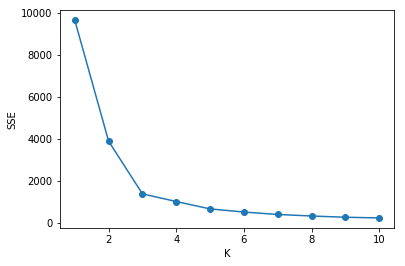

In [207]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(X1_pca)
        #获取K-means算法的SSE
    SSE.append(km.inertia_)
    #绘制曲线
plt.plot(range(1,11),SSE,marker="o")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

[0.9171335783608763, 0.610411575373303, 0.6103124286985645, 0.5006167359865762, 0.43344398149597746, 0.4543320603078695, 0.43128079096667066, 0.4236421724470386, 0.4069373339120413, 0.42818135267524293, 0.40857032268803284, 0.4015828827834644, 0.4076196286745038, 0.39271825442770864, 0.3729322296325539, 0.37972924086989746, 0.37318742635597746, 0.37771202415232935]


/Users/yangjie/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


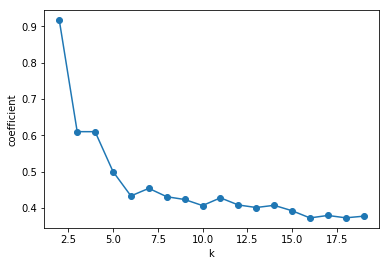

In [217]:
Scores = []  # 存放轮廓系数
from sklearn.metrics import silhouette_score
for k in range(2,20):
    kmeans = KMeans(n_clusters=k)  # 构造聚类器
    kmeans.fit(X1_pca)
    Scores.append(silhouette_score(X1_pca,kmeans.labels_,metric='euclidean'))
print(Scores)
X = range(2,20)
plt.xlabel('k')
plt.ylabel('coefficient')
plt.plot(X,Scores,'o-')
plt.show()

# 问题二——有监督分类问题

In [249]:
import pandas as pd
import os
csv_path = os.path.join("附件2.xlsx")
d2 = pd.read_excel(csv_path)
d2.head()
d3 = d2.dropna(subset=['OP'])


In [250]:
d2.describe()

,No,OP,551,552,553,554,555,556,557,558,...,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998
count,673.00000,658.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,...,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,337.00000,5.731003,0.351710,0.351710,0.351726,0.351726,0.351788,0.351788,0.351842,0.351842,...,0.064796,0.064715,0.064715,0.064626,0.064626,0.064533,0.064533,0.064443,0.064443,0.064349
std,194.42265,3.157795,0.082035,0.082035,0.081790,0.081790,0.081707,0.081707,0.081637,0.081637,...,0.031354,0.031350,0.031350,0.031346,0.031346,0.031334,0.031334,0.031324,0.031324,0.031319
min,1.00000,1.000000,0.184157,0.184157,0.184013,0.184013,0.183557,0.183557,0.183888,0.183888,...,-0.006410,-0.006452,-0.006452,-0.006535,-0.006535,-0.006620,-0.006620,-0.006676,-0.006676,-0.006753
25%,169.00000,3.000000,0.291075,0.291075,0.290324,0.290324,0.290505,0.290505,0.290134,0.290134,...,0.044121,0.044027,0.044027,0.044000,0.044000,0.043971,0.043971,0.043836,0.043836,0.043702
50%,337.00000,6.000000,0.342676,0.342676,0.342751,0.342751,0.342046,0.342046,0.342109,0.342109,...,0.062257,0.062124,0.062124,0.062033,0.062033,0.061971,0.061971,0.061928,0.061928,0.061835
75%,505.00000,8.000000,0.407031,0.407031,0.406899,0.406899,0.406440,0.406440,0.406364,0.406364,...,0.086191,0.086116,0.086116,0.085985,0.085985,0.085874,0.085874,0.085767,0.085767,0.085651
max,673.00000,11.000000,0.611261,0.611261,0.609269,0.609269,0.607656,0.607656,0.605150,0.605150,...,0.155363,0.155307,0.155307,0.155242,0.155242,0.155173,0.155173,0.155134,0.155134,0.155099


In [255]:
B=np.array(list(d3['OP']))
print(len(B))
list01 = list(d3['OP'])
set01 = set(list01) 
dict01 = {}
for item in set01:
    dict01.update({item:list01.count(item)})
print(dict01)

658
{1.0: 67, 2.0: 59, 3.0: 67, 4.0: 88, 5.0: 29, 6.0: 87, 7.0: 50, 8.0: 59, 9.0: 31, 10.0: 66, 11.0: 55}


In [843]:
name=list(d3[0:0])[2:]

# 制作数据集
A=[]
for i in name:
    a=d3[i]
    a=list(a)
    A.append(a)
import numpy as np
X=np.transpose(np.array(A))
print(X.shape)

# 尝试PCA降到二维直观表示数据
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# 保留前两个特征向量
scaler = MinMaxScaler().fit(X)
X1_scaled = scaler.transform(X)
pca = PCA(n_components=75).fit(X1_scaled)

# transform data onto the first two principal components
X = pca.transform(X1_scaled)
print("Reduced shape: {}".format(str(X.shape)))

# 制作标签集
B=np.array(list(d3['OP']))
B=B.astype(np.int)
Y=B

# 对数据集和标签集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y,test_size= 0.25,random_state=1)
print('X训练集大小：',X_train.shape)
print('X测试集大小：',X_test.shape)

from sklearn.preprocessing import StandardScaler# 对数据做标准化处理
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)# 在训练集上进行归一化拟合
X_test_scaled = scaler.transform(X_test)

(658, 3448)
Reduced shape: (658, 75)
X训练集大小： (493, 75)
X测试集大小： (165, 75)


In [844]:
list01 = list(d3['OP'])
set01 = set(list01) 
dict01 = {}
for item in set01:
    dict01.update({item:list(y_test).count(item)})
print(dict01)
dict02 = {}
for item in set01:
    dict02.update({item:list(y_train).count(item)})
print(dict02)

{1.0: 21, 2.0: 17, 3.0: 14, 4.0: 16, 5.0: 4, 6.0: 25, 7.0: 18, 8.0: 8, 9.0: 4, 10.0: 20, 11.0: 18}
{1.0: 46, 2.0: 42, 3.0: 53, 4.0: 72, 5.0: 25, 6.0: 62, 7.0: 32, 8.0: 51, 9.0: 27, 10.0: 46, 11.0: 37}


In [845]:
# 分类-logistc
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)# 默认C=1，C可以增大
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))# 训练和测试很接近，有可能欠拟合

logreg100 = LogisticRegression(C=100000).fit(X_train, y_train)# C=100，减弱正则化
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg1000 = LogisticRegression(C=10000000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg1000.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1000.score(X_test, y_test)))

Training set score: 0.858
Test set score: 0.727


/Users/yangjie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/yangjie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Training set score: 0.939
Test set score: 0.800
Training set score: 0.937
Test set score: 0.794


/Users/yangjie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [846]:
logreg10000 = LogisticRegression(C=10000000000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg10000.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10000.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.794


/Users/yangjie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [847]:
# 分类-决策树
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=9,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("Feature importances:")
print(tree.feature_importances_)
F=list(tree.feature_importances_)
f=[]
F.sort(reverse=1)
for i in F:
    if i >0:
        a=F.index(i)
        f.append(name[a])
print(f)

Accuracy on training set: 0.945
Accuracy on test set: 0.461
Feature importances:
[0.00415024 0.         0.07772552 0.0350007  0.08642133 0.00440177
 0.04494583 0.02290932 0.03483165 0.078842   0.05448519 0.01058796
 0.02275713 0.00242097 0.00484194 0.0224945  0.         0.01714662
 0.00484194 0.         0.00726291 0.         0.0411902  0.00614554
 0.         0.         0.02008626 0.00856877 0.         0.
 0.03096714 0.01113647 0.00617348 0.01701637 0.03668702 0.
 0.         0.02917944 0.02241847 0.00550547 0.         0.00672492
 0.         0.         0.02180898 0.00466261 0.03324229 0.
 0.01776165 0.00403495 0.01678424 0.         0.01205739 0.
 0.         0.00564893 0.00242097 0.00242097 0.00682274 0.00484194
 0.0136608  0.         0.00242097 0.         0.00751925 0.00484194
 0.03428689 0.00623037 0.         0.01291793 0.         0.
 0.00322796 0.         0.00451915]
[551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574,

In [848]:
# 分类——随机森林
from sklearn.ensemble import RandomForestClassifier# 随机森林无效
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

forest.feature_importances_
F1=list(forest.feature_importances_)
F=list(forest.feature_importances_)
F.sort(reverse=1)

f=[]
for i in F[:20]:
    a=F1.index(i)
    f.append(name[a])
print(f)

Accuracy on training set: 1.000
Accuracy on test set: 0.933
[555, 560, 553, 554, 561, 557, 566, 562, 556, 559, 573, 558, 579, 568, 581, 552, 588, 617, 584, 603]


In [849]:
# 分类——梯度上升
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0,max_depth=2)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

F=list(gbrt.feature_importances_)
F1=list(gbrt.feature_importances_)
F1.sort(reverse=1)
f=[]
for i in F1[:20]:
    a=F.index(i)
    f.append(name[a])
print(f)

Accuracy on training set: 1.000
Accuracy on test set: 0.794
[555, 560, 553, 557, 554, 561, 559, 566, 556, 568, 573, 617, 584, 563, 591, 562, 581, 558, 552, 588]


In [851]:
# 分类——支持向量机模型，对预处理敏感

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=200)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.945


In [852]:
# 制作数据集
A=[]
for i in name:
    a=d3[i]
    a=list(a)
    A.append(a)
import numpy as np
X=np.transpose(np.array(A))
print(X.shape)
# 尝试PCA降到二维直观表示数据
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# 保留前两个特征向量
scaler = MinMaxScaler().fit(X)
X1_scaled = scaler.transform(X)
pca = PCA(n_components=75).fit(X1_scaled)

# transform data onto the first two principal components
X = pca.transform(X1_scaled)
print("Reduced shape: {}".format(str(X.shape)))
# 对数据集和标签集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y,random_state=1)
print('X训练集大小：',X_train.shape)
print('X测试集大小：',X_test.shape)

(658, 3448)
Reduced shape: (658, 75)
X训练集大小： (493, 75)
X测试集大小： (165, 75)


In [853]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# 定义神经网络
#clf = MLPClassifier(hidden_layer_sizes=(25,), random_state=0, max_iter=50,shuffle=True)
clf= MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(380), random_state=1,max_iter=100,verbose=10,learning_rate_init=.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)
print(clf.score(X_train, y_train))
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_test_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.0
1.0
0.9575757575757575


# 问题三——有监督分类问题——近红外+中红外特征

In [387]:
import pandas as pd
import os
csv_path = os.path.join("附件3.xlsx")
d4 = pd.read_excel(csv_path)
d4.head()
d5 = d4.dropna(subset=['OP'])

In [424]:
len(d5)
d5.head()

,No,OP,4004,4005,4006,4007,4008,4009,4010,4011,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1,14.0,0.869187,0.869187,0.869769,0.869769,0.869769,0.869769,0.869879,0.869879,...,0.420139,0.420166,0.420166,0.420166,0.420166,0.420397,0.420397,0.420397,0.420397,0.420764
1,2,13.0,0.944521,0.944521,0.944225,0.944225,0.944225,0.944225,0.943621,0.943621,...,0.382078,0.382235,0.382235,0.382235,0.382235,0.382062,0.382062,0.382062,0.382062,0.382062
2,3,17.0,0.959754,0.959754,0.961532,0.961532,0.961532,0.961532,0.962453,0.962453,...,0.401328,0.401451,0.401451,0.401451,0.401451,0.401349,0.401349,0.401349,0.401349,0.401360
4,5,16.0,0.913759,0.913759,0.915178,0.915178,0.915178,0.915178,0.915747,0.915747,...,0.416887,0.416926,0.416926,0.416926,0.416926,0.417069,0.417069,0.417069,0.417069,0.418042
5,6,17.0,0.949069,0.949069,0.950782,0.950782,0.950782,0.950782,0.951666,0.951666,...,0.412473,0.412570,0.412570,0.412570,0.412570,0.412635,0.412635,0.412635,0.412635,0.412939


In [854]:
name = list(d5['No'])
A=[]
for i in name:
    A.append(list(d5.loc[i-1]))
print(len(A))

245


In [855]:
len(A[1][2:])

5996

In [856]:
name = []
for i in range(4004,10000):
    name.append(i)
len(name)

5996

/Users/yangjie/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


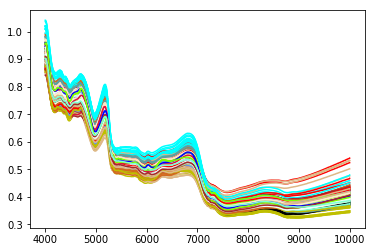

In [474]:
for i in range(245):
    if A[i][1]==1:
        plt.plot(name,A[i][2:],'-r')
    elif A[i][1]==1:
        plt.plot(name,A[i][2:],'-g')
    elif A[i][1]==2:
        plt.plot(name,A[i][2:],'-b')
    elif A[i][1]==3:
        plt.plot(name,A[i][2:],'black')
    elif A[i][1]==4:
        plt.plot(name,A[i][2:],'-y')
    elif A[i][1]==5:
        plt.plot(name,A[i][2:],'aqua')
    elif A[i][1]==6:
        plt.plot(name,A[i][2:],'aquamarine')
    elif A[i][1]==7:
        plt.plot(name,A[i][2:],'azure')
    elif A[i][1]==8:
        plt.plot(name,A[i][2:],'beige')
    elif A[i][1]==9:
        plt.plot(name,A[i][2:],'bisque')
    elif A[i][1]==10:
        plt.plot(name,A[i][2:],'blanchedalmond')
    elif A[i][1]==11:
        plt.plot(name,A[i][2:],'brown')
    elif A[i][1]==12:
        plt.plot(name,A[i][2:],'burlywood')
    elif A[i][1]==13:
        plt.plot(name,A[i][2:],'cadetblue')
    elif A[i][1]==14:
        plt.plot(name,A[i][2:],'chocolate')
    elif A[i][1]==15:
        plt.plot(name,A[i][2:],'cornflowerblue')
    elif A[i][1]==16:
        plt.plot(name,A[i][2:],'crimson')
    else:
        plt.plot(name,A[i][2:],'chartreuse')
plt.show()

In [479]:
import pandas as pd
import os
csv_path = os.path.join("附件3-2.xlsx")
d4_2 = pd.read_excel(csv_path)
d4_2.head()
d5_2 = d4_2.dropna(subset=['OP'])
print(len(d4_2))
print(len(d5_2))

255
245


In [480]:
d5_2.head()

,No,OP,552,553,554,555,556,557,558,559,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1,14.0,0.026602,0.031197,0.031197,0.034768,0.034768,0.036226,0.036226,0.037201,...,0.420139,0.420166,0.420166,0.420166,0.420166,0.420397,0.420397,0.420397,0.420397,0.420764
1,2,13.0,0.027282,0.033386,0.033386,0.038157,0.038157,0.040221,0.040221,0.041793,...,0.382078,0.382235,0.382235,0.382235,0.382235,0.382062,0.382062,0.382062,0.382062,0.382062
2,3,17.0,0.019621,0.028953,0.028953,0.036467,0.036467,0.040136,0.040136,0.042997,...,0.401328,0.401451,0.401451,0.401451,0.401451,0.401349,0.401349,0.401349,0.401349,0.401360
4,5,16.0,0.017975,0.028234,0.028234,0.036466,0.036466,0.040919,0.040919,0.044233,...,0.416887,0.416926,0.416926,0.416926,0.416926,0.417069,0.417069,0.417069,0.417069,0.418042
5,6,17.0,0.020617,0.029960,0.029960,0.037593,0.037593,0.041512,0.041512,0.044296,...,0.412473,0.412570,0.412570,0.412570,0.412570,0.412635,0.412635,0.412635,0.412635,0.412939


In [857]:
name = list(d5_2['No'])
A=[]
for i in name:
    A.append(list(d5_2.loc[i-1]))
print(len(A))
print(len(A[1][2:]))

name = []
for i in range(552,4000):
    name.append(i)
print(len(name))

245
9444
3448


In [858]:
for i in range(4004,10000):
    name.append(i)
len(name)

9444

/Users/yangjie/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


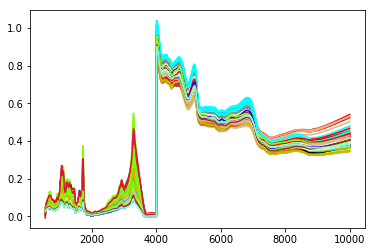

In [483]:
for i in range(245):
    if A[i][1]==1:
        plt.plot(name,A[i][2:],'-r')
    elif A[i][1]==1:
        plt.plot(name,A[i][2:],'-g')
    elif A[i][1]==2:
        plt.plot(name,A[i][2:],'-b')
    elif A[i][1]==3:
        plt.plot(name,A[i][2:],'black')
    elif A[i][1]==4:
        plt.plot(name,A[i][2:],'-y')
    elif A[i][1]==5:
        plt.plot(name,A[i][2:],'aqua')
    elif A[i][1]==6:
        plt.plot(name,A[i][2:],'aquamarine')
    elif A[i][1]==7:
        plt.plot(name,A[i][2:],'azure')
    elif A[i][1]==8:
        plt.plot(name,A[i][2:],'beige')
    elif A[i][1]==9:
        plt.plot(name,A[i][2:],'bisque')
    elif A[i][1]==10:
        plt.plot(name,A[i][2:],'blanchedalmond')
    elif A[i][1]==11:
        plt.plot(name,A[i][2:],'brown')
    elif A[i][1]==12:
        plt.plot(name,A[i][2:],'burlywood')
    elif A[i][1]==13:
        plt.plot(name,A[i][2:],'cadetblue')
    elif A[i][1]==14:
        plt.plot(name,A[i][2:],'chocolate')
    elif A[i][1]==15:
        plt.plot(name,A[i][2:],'cornflowerblue')
    elif A[i][1]==16:
        plt.plot(name,A[i][2:],'crimson')
    else:
        plt.plot(name,A[i][2:],'chartreuse')
plt.show()

In [859]:
# 拼接特征+整体降维+进行预测orBP神经网络
name=list(d5_2[0:0])[2:]

# 制作数据集
A=[]
for i in name:
    a=d5_2[i]
    a=list(a)
    A.append(a)
import numpy as np
X=np.transpose(np.array(A))
print(X.shape)

(245, 9444)


In [861]:
# 尝试PCA降到二维直观表示数据
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# 保留前两个特征向量
scaler = MinMaxScaler().fit(X)
X1_scaled = scaler.transform(X)
pca = PCA(n_components=85).fit(X1_scaled)

# transform data onto the first two principal components
X = pca.transform(X1_scaled)
print("Reduced shape: {}".format(str(X.shape)))

Reduced shape: (245, 200)


In [865]:
# 制作标签集
B=np.array(list(d5_2['OP']))
B=B.astype(np.int)
print(len(B))
Y=B

# 对数据集和标签集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y,random_state=1)
print('X训练集大小：',X_train.shape)
print('X测试集大小：',X_test.shape)

from sklearn.preprocessing import StandardScaler# 对数据做标准化处理
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)# 在训练集上进行归一化拟合
X_test_scaled = scaler.transform(X_test)

245
X训练集大小： (183, 200)
X测试集大小： (62, 200)


In [866]:
list01 = list(d5_2['OP'])
set01 = set(list01) 
dict01 = {}
for item in set01:
    dict01.update({item:list(y_test).count(item)})
print(dict01)
dict02 = {}
for item in set01:
    dict02.update({item:list(y_train).count(item)})
print(dict02)

{1.0: 2, 2.0: 8, 3.0: 1, 4.0: 5, 5.0: 5, 6.0: 6, 7.0: 3, 8.0: 2, 9.0: 3, 10.0: 3, 11.0: 2, 12.0: 3, 13.0: 5, 14.0: 4, 15.0: 3, 16.0: 2, 17.0: 5}
{1.0: 12, 2.0: 6, 3.0: 13, 4.0: 9, 5.0: 10, 6.0: 9, 7.0: 12, 8.0: 13, 9.0: 11, 10.0: 11, 11.0: 12, 12.0: 12, 13.0: 10, 14.0: 10, 15.0: 12, 16.0: 12, 17.0: 9}


In [908]:
# 分类-logistc
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)# 默认C=1，C可以增大
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))# 训练和测试很接近，有可能欠拟合

logreg100 = LogisticRegression(C=100000).fit(X_train, y_train)# C=100，减弱正则化
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg1000 = LogisticRegression(C=180000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg1000.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1000.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.968
Training set score: 1.000
Test set score: 0.968
Training set score: 1.000
Test set score: 0.968


In [909]:
# 分类-决策树
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=90,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("Feature importances:")
print(tree.feature_importances_)
F=list(tree.feature_importances_)
f=[]
F.sort(reverse=1)
for i in F:
    if i >0:
        a=F.index(i)
        f.append(name[a])
print(f)

Accuracy on training set: 1.000
Accuracy on test set: 0.565
Feature importances:
[0.1063935  0.         0.         0.05158691 0.         0.10446554
 0.15069524 0.01476319 0.12537403 0.         0.02077072 0.01899828
 0.08843508 0.0850584  0.02617111 0.         0.         0.
 0.         0.         0.0213246  0.05688045 0.         0.
 0.         0.         0.         0.         0.03300656 0.
 0.         0.         0.0058158  0.0135702  0.         0.
 0.         0.03714293 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0058158  0.         0.         0.         0.
 0.01046844 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0155088  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0077544
 0.        ]
[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 5

In [910]:
# 分类——随机森林
from sklearn.ensemble import RandomForestClassifier# 随机森林无效
forest = RandomForestClassifier(n_estimators=10000, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

forest.feature_importances_
F1=list(forest.feature_importances_)
F=list(forest.feature_importances_)
F.sort(reverse=1)

f=[]
for i in F[:20]:
    a=F1.index(i)
    f.append(name[a])
print(f)

Accuracy on training set: 1.000
Accuracy on test set: 0.887
[557, 560, 558, 564, 552, 565, 555, 553, 573, 567, 559, 561, 554, 572, 589, 562, 576, 588, 569, 563]


In [911]:
# 分类——随机森林
from sklearn.ensemble import RandomForestClassifier# 随机森林无效
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

forest.feature_importances_
F1=list(forest.feature_importances_)
F=list(forest.feature_importances_)
F.sort(reverse=1)

f=[]
for i in F[:20]:
    a=F1.index(i)
    f.append(name[a])
print(f)

Accuracy on training set: 1.000
Accuracy on test set: 0.887
[557, 560, 558, 552, 564, 565, 555, 553, 567, 573, 559, 561, 554, 572, 589, 562, 576, 588, 563, 569]


In [912]:
# 分类——梯度上升
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0,max_depth=3)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

F=list(gbrt.feature_importances_)
F1=list(gbrt.feature_importances_)
F1.sort(reverse=1)
f=[]
for i in F1[:20]:
    a=F.index(i)
    f.append(name[a])
print(f)

Accuracy on training set: 1.000
Accuracy on test set: 0.597
[560, 564, 558, 552, 554, 567, 555, 565, 557, 561, 573, 569, 577, 600, 568, 578, 589, 571, 559, 603]


In [916]:
# 分类——支持向量机模型，对预处理敏感

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.903


In [906]:
# 制作数据集
A=[]
for i in name:
    a=d5_2[i]
    a=list(a)
    A.append(a)
import numpy as np
X=np.transpose(np.array(A))
print(X.shape)
# 尝试PCA降到二维直观表示数据
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# 保留前两个特征向量
scaler = MinMaxScaler().fit(X)
X1_scaled = scaler.transform(X)
pca = PCA(n_components=85).fit(X1_scaled)

# transform data onto the first two principal components
X = pca.transform(X1_scaled)
print("Reduced shape: {}".format(str(X.shape)))
# 对数据集和标签集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y,random_state=1)
print('X训练集大小：',X_train.shape)
print('X测试集大小：',X_test.shape)

(245, 9444)
Reduced shape: (245, 85)
X训练集大小： (183, 85)
X测试集大小： (62, 85)


In [929]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# 定义神经网络
#clf = MLPClassifier(hidden_layer_sizes=(25,), random_state=0, max_iter=50,shuffle=True)
clf= MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(800), random_state=1,max_iter=100,verbose=10,learning_rate_init=.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)
print(clf.score(X_train, y_train))
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_test_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.0
1.0
0.967741935483871


In [930]:
y_test_pred

array([16,  6, 11,  9, 13,  9,  2,  2,  1, 17, 12, 13,  6, 15,  2, 13,  5,
       10, 13,  6,  7, 15,  3, 11,  5, 14,  2,  6,  5,  9,  7, 12,  1, 10,
        6, 14,  2,  8, 10,  7,  2, 16,  2, 17, 14, 12,  4,  4,  4, 14, 17,
        8,  9, 15, 17, 13,  5,  4,  4, 12, 17,  6])

In [931]:
y_test

array([16,  6, 11,  9, 13,  9,  2,  2,  1, 17, 12, 13,  6, 15,  2, 13,  5,
       10, 13,  6,  7, 15,  3, 11,  5, 14,  2,  6,  5,  9,  7, 12,  1, 10,
        6, 14,  2,  8, 10,  7,  2, 16,  2, 17, 14,  5,  4,  4,  4, 14, 17,
        8,  2, 15, 17, 13,  5,  4,  4, 12, 17,  6])

# 问题4——多标签分类

In [918]:
import pandas as pd
import os
csv_path = os.path.join("附件4.xlsx")
d6 = pd.read_excel(csv_path)
d6.head()
d7 = d6.dropna(subset=['OP'])# 所属地区
d8 = d6.dropna(subset=['Class'])# 所属类别

In [920]:
d7.head()

,No,Class,OP,4004,4005.00016680567,4006.00033361134,4007.00050041701,4008.00066722268,4009.00083402835,4010.00100083402,...,9990.99849874895,9991.99866555462,9992.99883236029,9993.99899916597,9994.99916597164,9995.99933277731,9996.99949958298,9997.99966638865,9998.99983319432,10000
0,1,B,16.0,0.741947,0.741854,0.741854,0.741783,0.741783,0.741477,0.741477,...,0.566066,0.566066,0.565828,0.565828,0.565920,0.565920,0.566121,0.566121,0.566587,0.566587
2,3,NaN,10.0,0.696341,0.696134,0.696134,0.695766,0.695766,0.695440,0.695440,...,0.556446,0.556446,0.556551,0.556551,0.556642,0.556642,0.556768,0.556768,0.557080,0.557080
4,5,NaN,3.0,0.810875,0.810875,0.810956,0.810956,0.810956,0.810956,0.810821,...,0.505071,0.505318,0.505318,0.505318,0.505318,0.505493,0.505493,0.505493,0.505493,0.505686
5,6,NaN,13.0,0.765117,0.764857,0.764857,0.764790,0.764790,0.764818,0.764818,...,0.530718,0.530718,0.530680,0.530680,0.530777,0.530777,0.530862,0.530862,0.531056,0.531056
6,7,B,9.0,0.802411,0.802232,0.802232,0.801999,0.801999,0.801771,0.801771,...,0.553452,0.553452,0.553866,0.553866,0.554373,0.554373,0.554239,0.554239,0.554232,0.554232


In [919]:
d8.head()

,No,Class,OP,4004,4005.00016680567,4006.00033361134,4007.00050041701,4008.00066722268,4009.00083402835,4010.00100083402,...,9990.99849874895,9991.99866555462,9992.99883236029,9993.99899916597,9994.99916597164,9995.99933277731,9996.99949958298,9997.99966638865,9998.99983319432,10000
0,1,B,16.0,0.741947,0.741854,0.741854,0.741783,0.741783,0.741477,0.741477,...,0.566066,0.566066,0.565828,0.565828,0.565920,0.565920,0.566121,0.566121,0.566587,0.566587
1,2,B,NaN,0.750204,0.749996,0.749996,0.749809,0.749809,0.749672,0.749672,...,0.519781,0.519781,0.519802,0.519802,0.519924,0.519924,0.519708,0.519708,0.519841,0.519841
3,4,C,NaN,0.837420,0.837420,0.837833,0.837833,0.837833,0.837833,0.837914,...,0.471410,0.471596,0.471596,0.471596,0.471596,0.471807,0.471807,0.471807,0.471807,0.472012
6,7,B,9.0,0.802411,0.802232,0.802232,0.801999,0.801999,0.801771,0.801771,...,0.553452,0.553452,0.553866,0.553866,0.554373,0.554373,0.554239,0.554239,0.554232,0.554232
7,8,C,3.0,0.848519,0.848519,0.848664,0.848664,0.848664,0.848664,0.848431,...,0.485511,0.485606,0.485606,0.485606,0.485606,0.485744,0.485744,0.485744,0.485744,0.485849


In [941]:
# 拼接特征+整体降维+进行预测orBP神经网络
name=list(d7[0:0])[3:]

# 制作数据集
A=[]
for i in name:
    a=d7[i]
    a=list(a)
    A.append(a)
import numpy as np
X=np.transpose(np.array(A))
print(X.shape)


# 尝试PCA降到二维直观表示数据
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# 保留前两个特征向量
scaler = MinMaxScaler().fit(X)
X1_scaled = scaler.transform(X)
pca = PCA(n_components=65).fit(X1_scaled)

# transform data onto the first two principal components
X = pca.transform(X1_scaled)
print("Reduced shape: {}".format(str(X.shape)))

# 制作标签集
B=np.array(list(d7['OP']))
B=B.astype(np.int)
print(len(B))
Y=B

# 对数据集和标签集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y,random_state=1)
print('X训练集大小：',X_train.shape)
print('X测试集大小：',X_test.shape)

from sklearn.preprocessing import StandardScaler# 对数据做标准化处理
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)# 在训练集上进行归一化拟合
X_test_scaled = scaler.transform(X_test)

(349, 5996)
Reduced shape: (349, 65)
349
X训练集大小： (261, 65)
X测试集大小： (88, 65)


In [943]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# 定义神经网络
#clf = MLPClassifier(hidden_layer_sizes=(25,), random_state=0, max_iter=50,shuffle=True)
clf= MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(800), random_state=1,max_iter=100,verbose=10,learning_rate_init=.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)
print(clf.score(X_train, y_train))
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_test_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.0
1.0
0.8409090909090909


In [1]:
from sko.PSO import PSO

In [2]:
import pandas as pd
Mo = pd.read_excel("Molecular_Descriptor.xlsx")
ER = pd.read_excel("ERα_activity.xlsx")
AD = pd.read_excel("ADMET.xlsx")

In [4]:
import numpy as np
X = []
names = []
for i in Mo:
    if i == 'SMILES':
        N=np.array(Mo[i])
    # 其余变量均作为特征进行筛选
    else:
        X.append(np.array(Mo[i]))
        names.append(i)
X = np.transpose(np.array(X))
print('X.shape', X.shape)
Y = np.array(ER['pIC50'])# 越大越好
print('Y.shape', Y.shape)
Y1 = np.array(AD['Caco-2'])# 越大越好
print('Y1.shape', Y1.shape)
Y2 = np.array(AD['CYP3A4'])# 越大越好
print('Y2.shape', Y2.shape)
Y3 = np.array(AD['hERG'])# 越小越好
print('Y3.shape', Y3.shape)
Y4 = np.array(AD['HOB'])# 越大越好
print('Y4.shape', Y4.shape)
Y5 = np.array(AD['MN'])# 越小越好
print('Y5.shape', Y5.shape)

X.shape (1974, 729)
Y.shape (1974,)
Y1.shape (1974,)
Y2.shape (1974,)
Y3.shape (1974,)
Y4.shape (1974,)
Y5.shape (1974,)


In [6]:
B=[]
k0=['minHBa', 'ATSc3', 'WTPT-5', 'hmin', 'nHBAcc', 'MLFER_S', 'maxHBa', 'ATSc4', 'ETA_BetaP_s', 'MLFER_BH', 'MDEC-23', 'SHaaCH', 'TopoPSA', 'MAXDP2', 'ATSc2', 'MLFER_BO', 'gmax', 'MAXDP', 'ETA_Epsilon_4', 'ATSc1', 'WTPT-3', 'ETA_dEpsilon_C']
for i in names:
    if i in k0:
        B.append(list(Mo[i]))
B=np.transpose(np.array(B))
print(B.shape)

(1974, 22)


In [132]:
# 对数据集和标签集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(B, Y2,test_size= 0.3,random_state=1)
print('X训练集大小：',X_train.shape)
print('X测试集大小：',X_test.shape)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# 定义神经网络
#clf = MLPClassifier(hidden_layer_sizes=(25,), random_state=0, max_iter=50,shuffle=True)
BP= MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(300), random_state=1,max_iter=100,verbose=10,learning_rate_init=.1)
BP.fit(X_train, y_train)
y_pred = BP.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)
print(BP.score(X_train, y_train))
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_test_pred =BP.predict(X_test)
print(BP.score(X_test, y_test))

X训练集大小： (1381, 22)
X测试集大小： (593, 22)
0.0
1.0
0.9342327150084317


/Users/yangjie/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [222]:
def demo_func():
    factors = np.zeros(X_test.shape)
    pred = BP.predict(X_test)
    return pred

In [223]:
pred = demo_func()

In [224]:
len(pred)

593

In [225]:
pop_num =593 # 种群数量
import numpy
pso = PSO(demo_func(), dim=22, pop=pop_num, max_iter=200, lb=lb, ub=ub, w=0.8, c1=0.5,c2=0.5)
pso.run()

TypeError: 'numpy.ndarray' object is not callable

In [205]:
help(PSO)

Help on class PSO in module sko.PSO:

class PSO(sko.base.SkoBase)
 |  Do PSO (Particle swarm optimization) algorithm.
 |  
 |  This algorithm was adapted from the earlier works of J. Kennedy and
 |  R.C. Eberhart in Particle Swarm Optimization [IJCNN1995]_.
 |  
 |  The position update can be defined as:
 |  
 |  .. math::
 |  
 |     x_{i}(t+1) = x_{i}(t) + v_{i}(t+1)
 |  
 |  Where the position at the current step :math:`t` is updated using
 |  the computed velocity at :math:`t+1`. Furthermore, the velocity update
 |  is defined as:
 |  
 |  .. math::
 |  
 |     v_{ij}(t + 1) = w * v_{ij}(t) + c_{p}r_{1j}(t)[y_{ij}(t) − x_{ij}(t)]
 |                     + c_{g}r_{2j}(t)[\hat{y}_{j}(t) − x_{ij}(t)]
 |  
 |  Here, :math:`cp` and :math:`cg` are the cognitive and social parameters
 |  respectively. They control the particle's behavior given two choices: (1) to
 |  follow its *personal best* or (2) follow the swarm's *global best* position.
 |  Overall, this dictates if the swarm is expl

In [147]:
X_test.shape

(593, 22)

In [213]:
for i in range(22):
    lb[i]=min(np.transpose(B)[i])
    ub[i]=max(np.transpose(B)[i])

In [214]:
ub.shape

(22,)

In [215]:
lb.shape

(22,)